In [1]:
##  소분류 중분류별 증가률 찾기

In [70]:
import pandas as pd
import seaborn as sns

a = pd.read_pickle('dataset/대분류코드_rate.pkl')
a

구매월,1,2,3,4,5,6,7,8,9,10,...,2_to_3,3_to_4,4_to_5,5_to_6,6_to_7,7_to_8,8_to_9,9_to_10,10_to_11,11_to_12
대분류코드,,,,,,,,,,,,,,,,,,,,,
1,3990902560,1893295550,2246471230,2323541910,2454699900,2375256140,2379892100,3750087280,2821486310,2204613460,...,18.654017,3.430744,5.644744,-3.236394,0.195177,57.573836,-24.762116,-21.863400,15.199658,7.926678
2,2721915580,2394034760,3027593800,3018335340,3842903150,3091997460,3459848130,2580913770,2984574330,3583268960,...,26.464070,-0.305803,27.318628,-19.540063,11.896862,-25.403842,15.640219,20.059632,6.053595,3.593332
3,640063510,582114640,685967040,713391840,782820040,637779330,502612990,547864930,702693040,776776600,...,17.840541,3.997976,9.732127,-18.527976,-21.193277,9.003337,28.260270,10.542805,13.987509,-4.125249
4,6239797810,5541265350,6230621330,5595249340,5910940820,4992376400,4777645600,4272319600,5237055670,7590717340,...,12.440407,-10.197570,5.642134,-15.540071,-4.301174,-10.576883,22.581084,44.942460,22.087669,-17.399940
5,1462232590,962130610,1189110840,1395462770,1434504380,1286640870,995488180,762248310,1109024930,1749318990,...,23.591416,17.353465,2.797754,-10.307637,-22.628901,-23.429698,45.493918,57.734866,13.229423,-5.427521
6,1618832130,1397057400,1855666360,2290767720,2303110350,1999273900,1590898860,1295810240,1680368640,2498504090,...,32.826780,23.447176,0.538799,-13.192440,-20.426168,-18.548547,29.677061,48.687855,3.633786,-5.901285
7,998370750,1065401660,1111064270,993455370,1083330860,1237051670,1139173450,1027693590,979129120,1126605290,...,4.285953,-10.585247,9.046757,14.189646,-7.912218,-9.786030,-4.725579,15.061974,15.896101,-20.231633
8,2145306330,2113292050,2388782750,2272114050,2719298850,2033185770,1876134560,2193058720,1901186870,2650809030,...,13.036092,-4.884023,19.681442,-25.231250,-7.724391,16.892400,-13.308894,39.429168,27.454105,-7.302478
9,1140252000,1130719980,1247051750,1326076910,1268460610,1213427530,1086405570,1308562160,1185932580,1713803630,...,10.288292,6.336959,-4.344869,-4.338572,-10.468030,20.448771,-9.371322,44.511051,2.620067,-27.209308


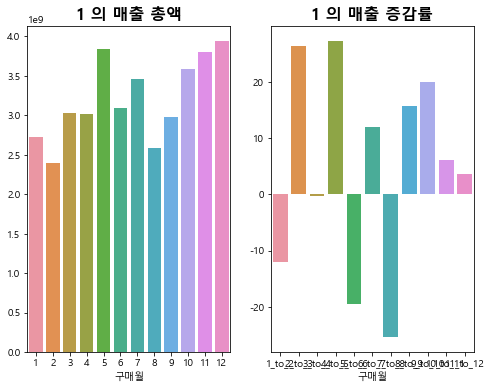

In [264]:
# 데이터프레임 슬라이싱 / a1 = 1월~12월 매출  , a2 = 1월~12월 매출증감
# df에는 df명 index에는 인덱스의 숫자 번호가 들어가야함
def slice_df(df,index): 
    df1 = df.iloc[[index]].iloc[:,:12] ## 수정요망
    df2 = df.iloc[[index]].iloc[:,12:] ## 수정요망
    index = df.index[index-1]
    
    return df1, df2 , index

# 슬라이싱된 두 데이터(매출총합, 매출증감)을 각각 시각화 
def visualization_sales_per(df1, df2, index):
    import matplotlib.pyplot as plt
    from matplotlib import rc
    import numpy as np

    rc('font',family='Malgun Gothic') # 한글 폰트 설정
    plt.rcParams['axes.unicode_minus'] = False #
    
    
    def bar_color(df,color1,color2):
        return np.where(df.values>0,color1,color2).T
    
    fig, ax = plt.subplots(ncols=2,figsize=(8, 6))
    
    sns.barplot(data=df1,ax=ax[0])
    sns.barplot(data=df2,ax=ax[1])
    
    # 타이틀
    ax[0].set_title(f'{index} 의 매출 총액',fontsize=16,fontweight='bold')
    ax[1].set_title(f"{index} 의 매출 증감률",fontsize=16,fontweight='bold')
    

# 두 함수 종합 (데이터프레임, 보고자하는인덱스 넣으면 데이터프레임의 해당 인덱스(한개)에 대한 그래프 반환)  
def df_visualization(df,index):
    df1, df2, index = slice_df(df,index)
    
    visualization_sales_per(df1,df2,index)
    

# 얘만 쓰면 다 돌아가요, x에 데이터프레임 y에 인덱스   ex)))) df_visualization(x,y)
df_visualization(a, 1)

<ipython-input-264-172414967e89>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(ncols=2,figsize=(8, 6))


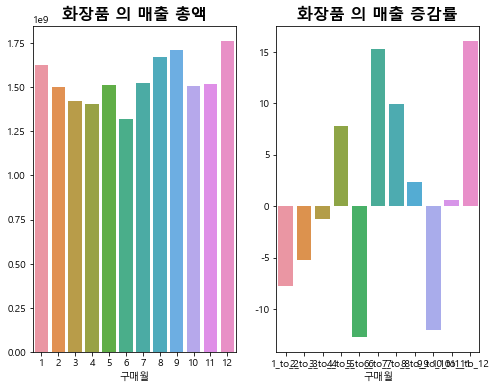

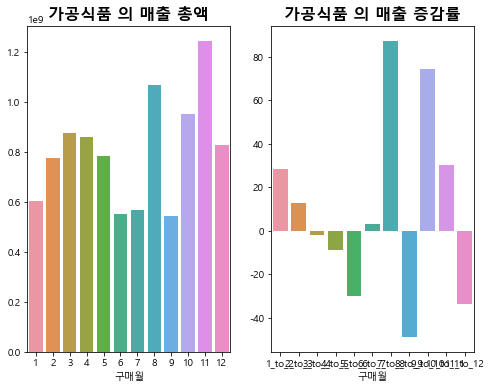

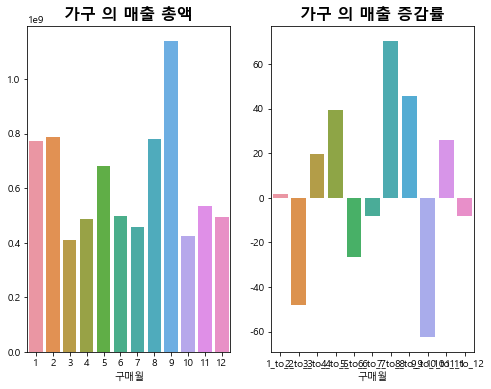

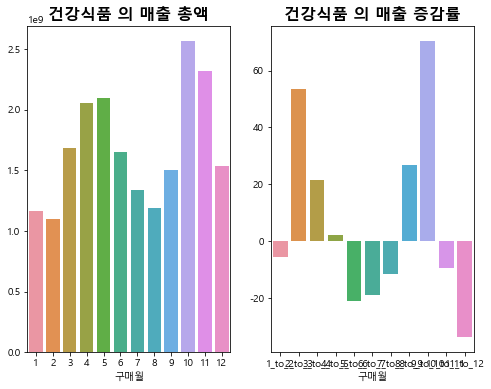

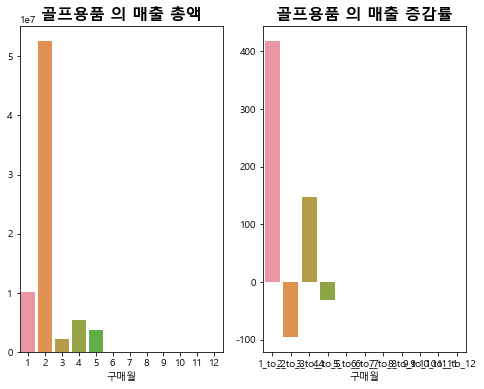

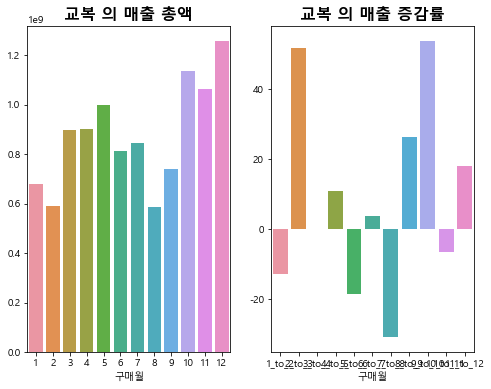

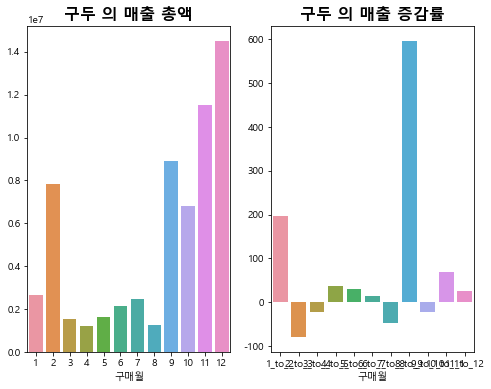

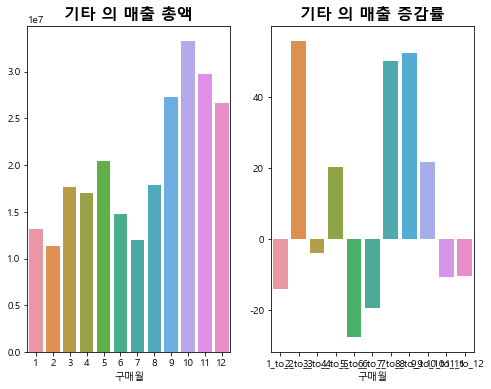

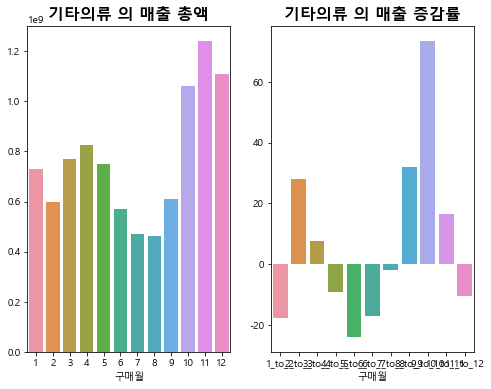

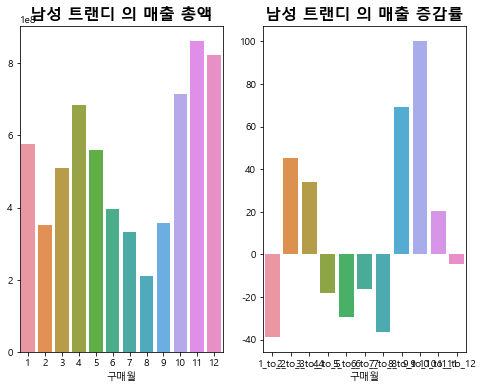

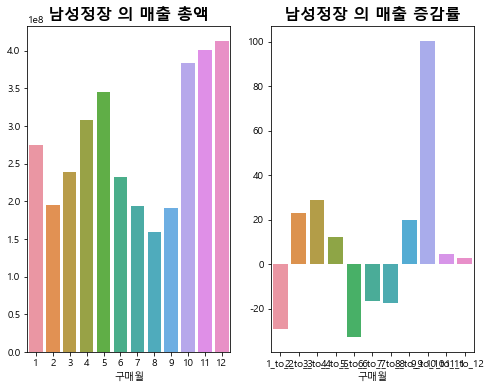

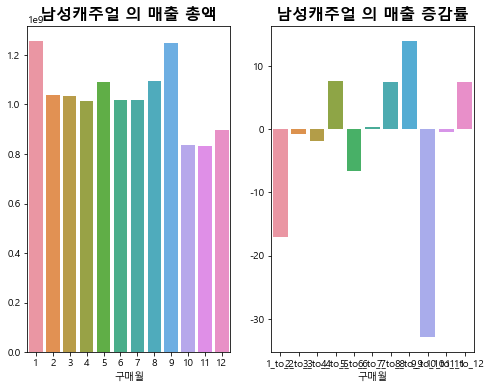

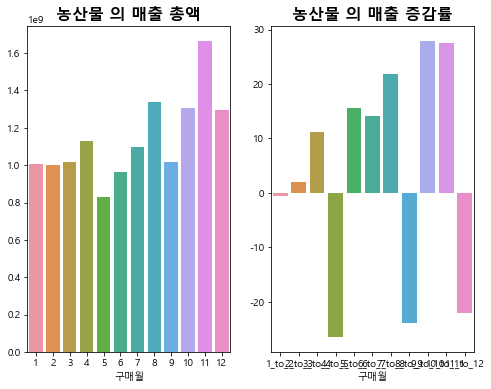

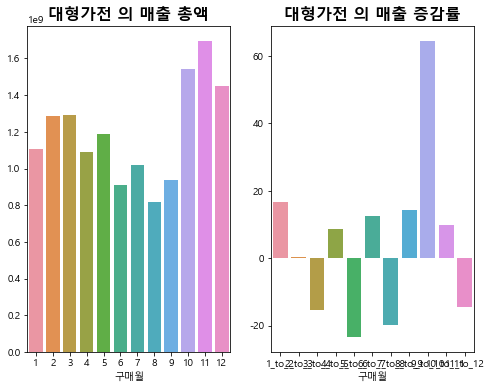

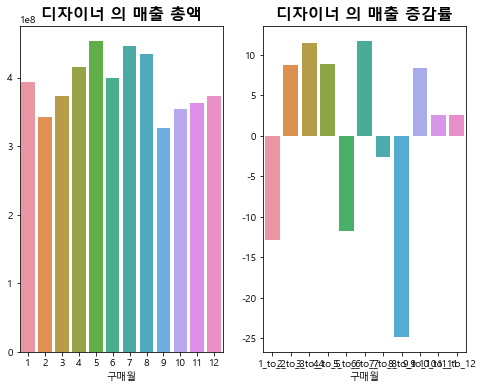

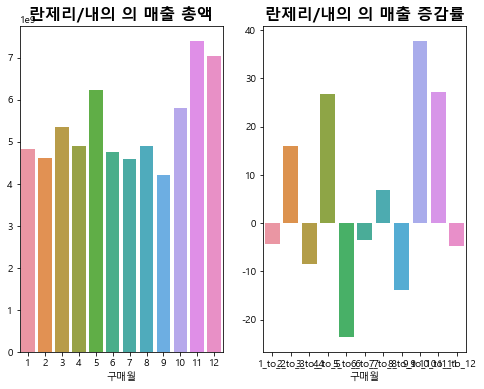

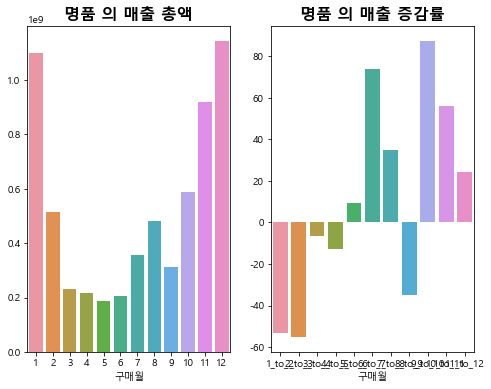

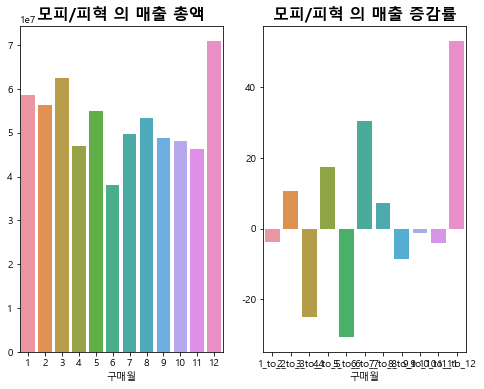

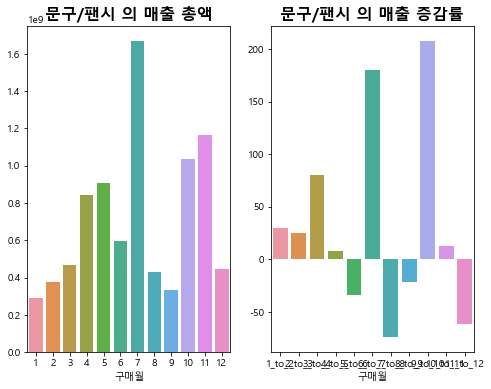

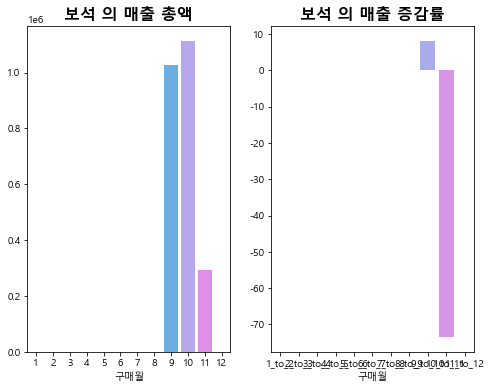

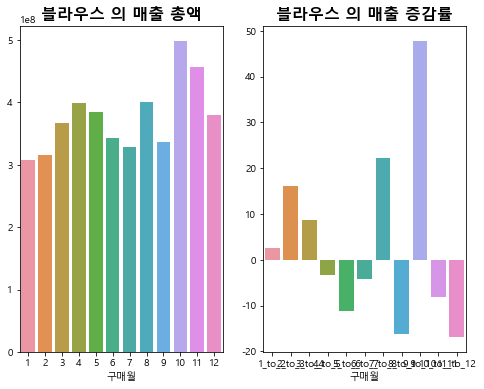

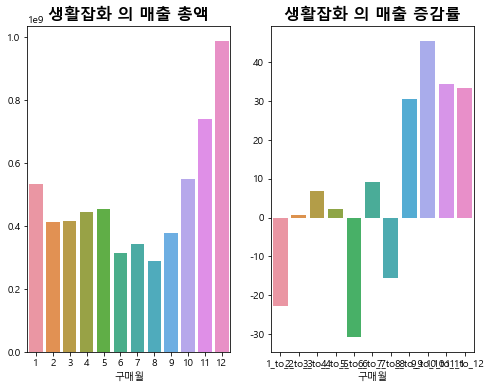

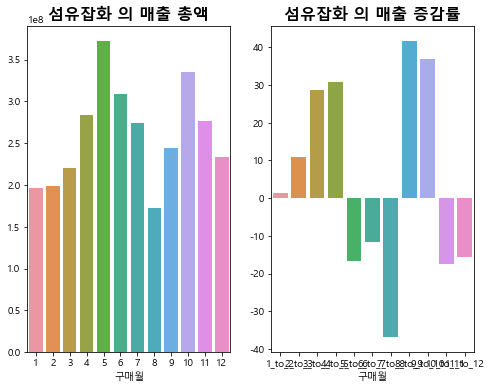

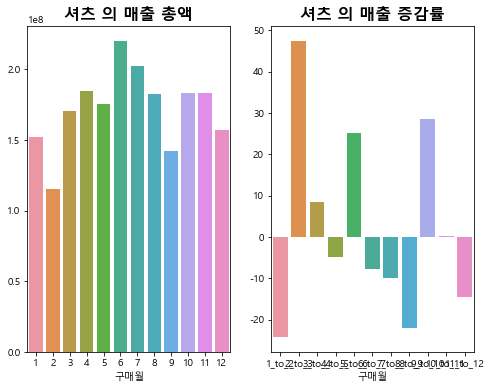

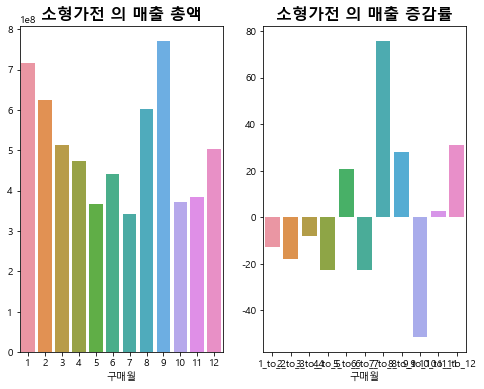

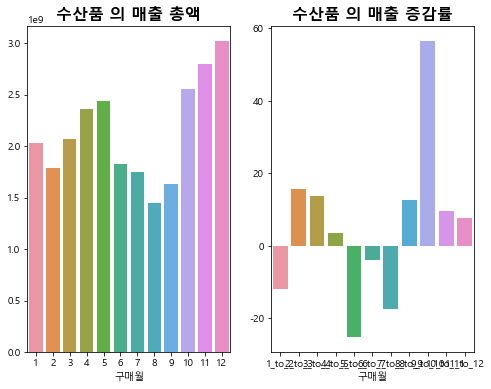

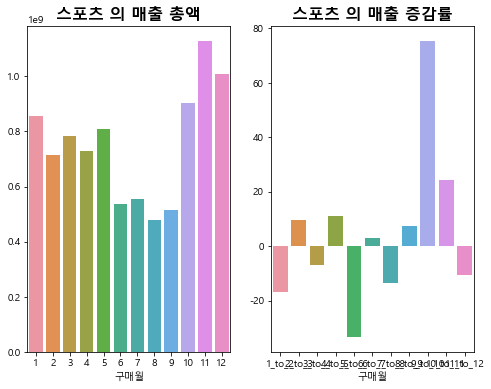

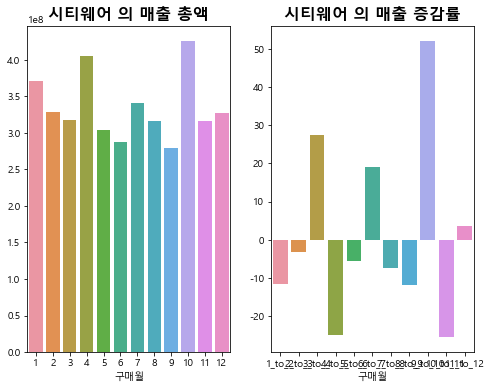

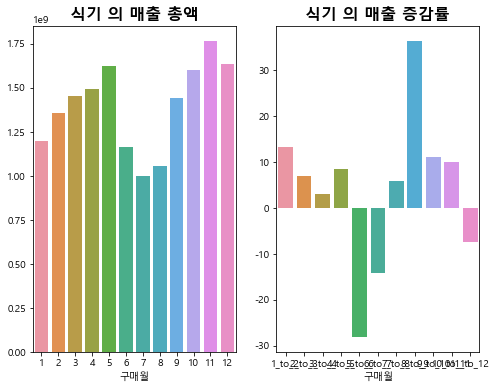

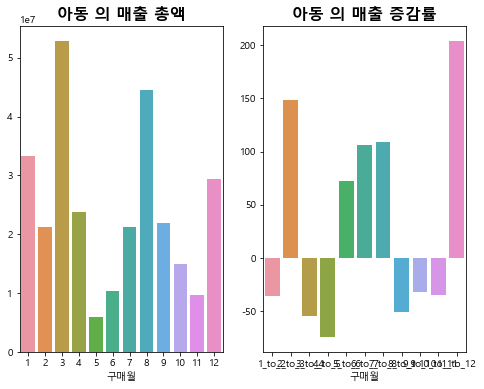

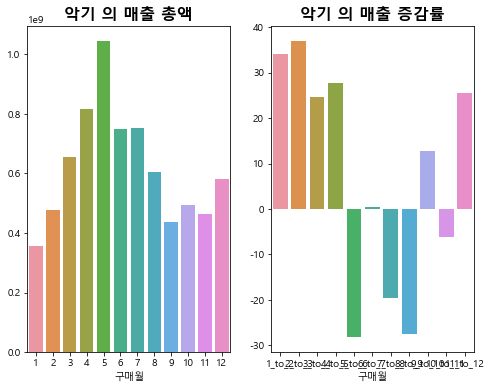

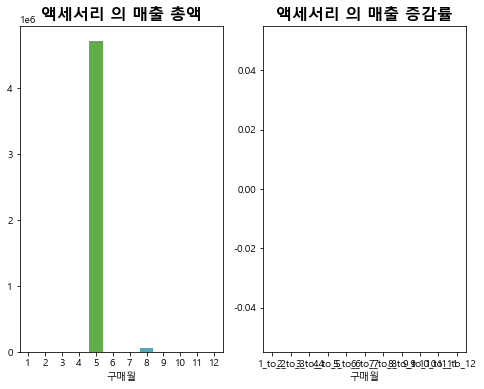

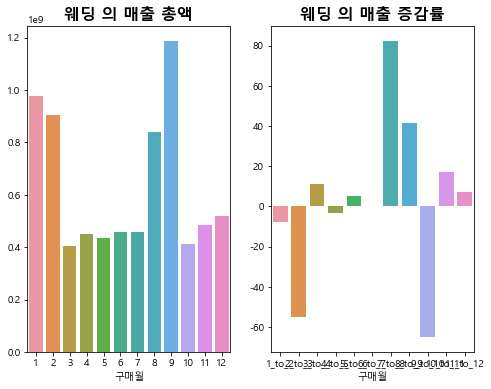

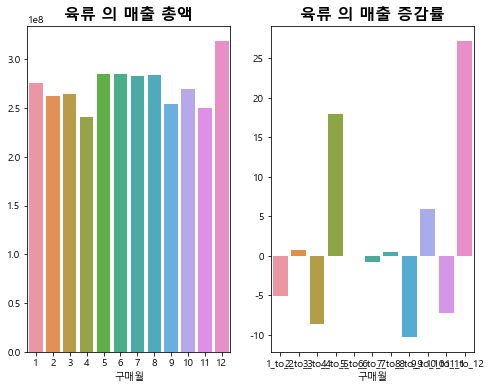

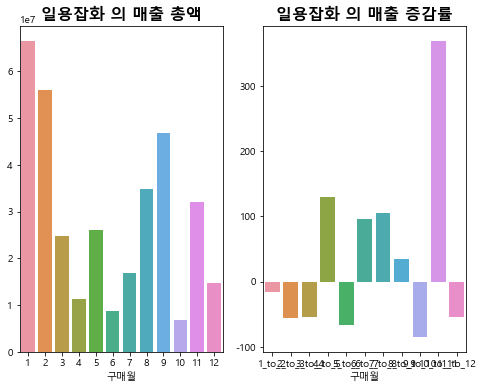

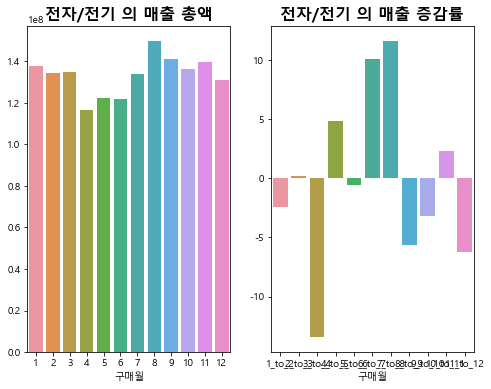

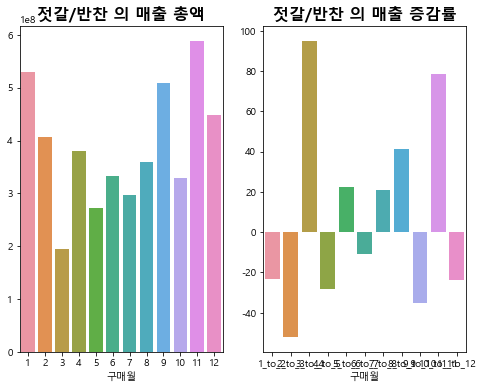

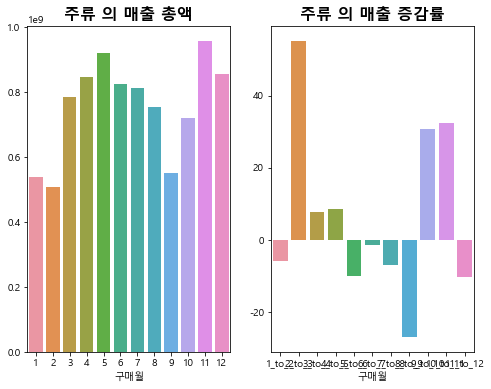

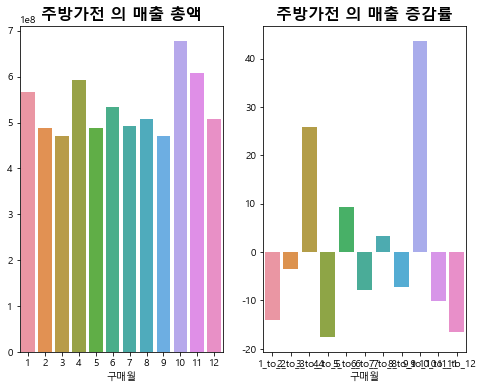

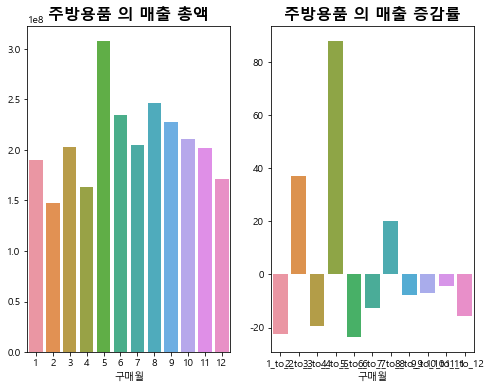

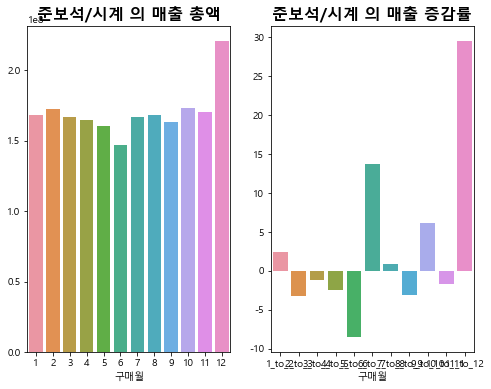

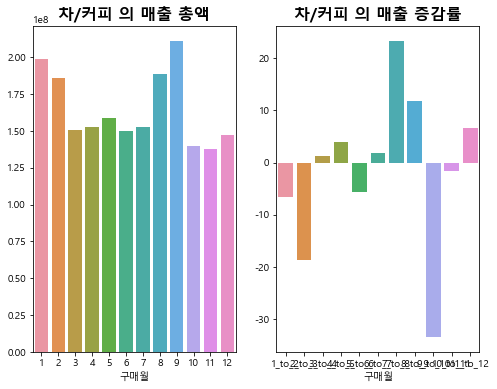

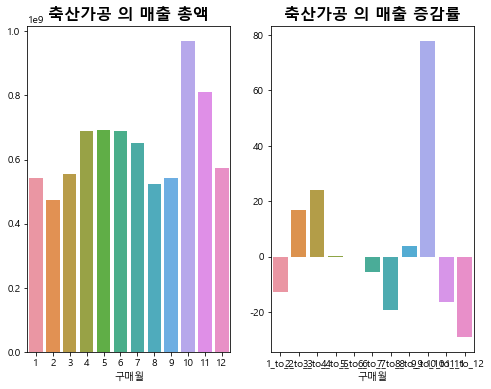

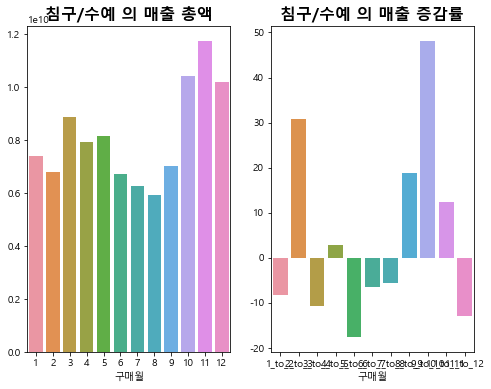

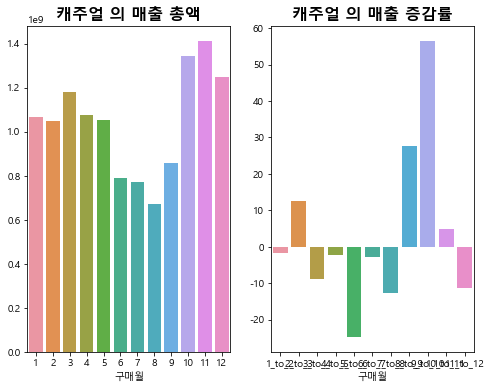

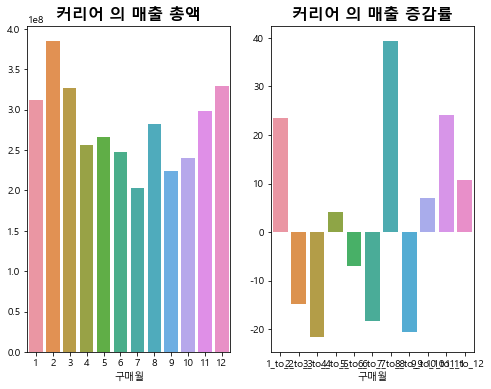

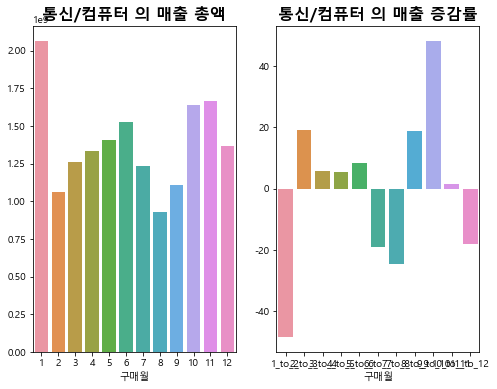

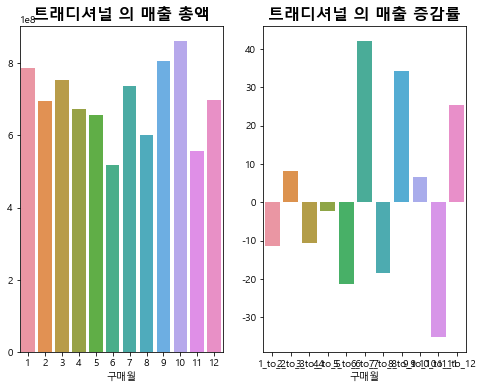

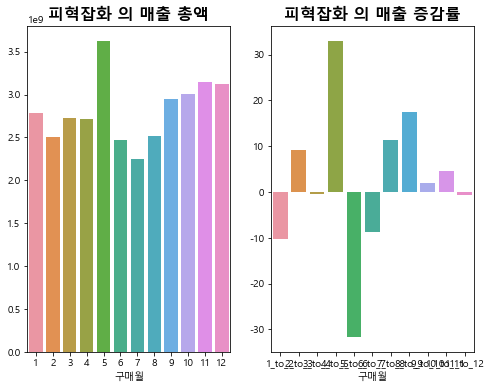

In [274]:
for i in range(0,len(A_data_mid)):
    df_visualization(A_data_mid, i)

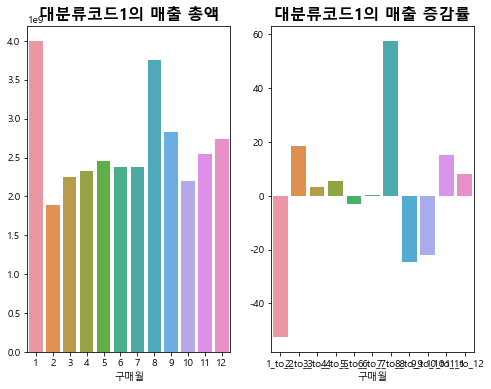

In [235]:

# 데이터프레임 슬라이싱 / a1 = 1월~12월 매출  , a2 = 1월~12월 매출증감
def slice_df(df,index): 
    df1 = df[(df.index == index)].iloc[:,:12]
    df2 = df[(df.index == index)].iloc[:,12:]
    name = df.index.name
    
    return df1, df2 , index ,name

# 슬라이싱된 두 데이터(매출총합, 매출증감)을 각각 시각화 
def visualization_sales_per(df1, df2, index, name):
    import matplotlib.pyplot as plt
    from matplotlib import rc
    import numpy as np

    rc('font',family='Malgun Gothic') # 한글 폰트 설정
    plt.rcParams['axes.unicode_minus'] = False #
    
    
    def bar_color(df,color1,color2):
        return np.where(df.values>0,color1,color2).T
    
    fig, ax = plt.subplots(ncols=2,figsize=(8, 6))
    
    sns.barplot(data=df1,ax=ax[0])
    sns.barplot(data=df2,ax=ax[1])
    
    # 타이틀
    ax[0].set_title(f'{name}{index}의 매출 총액',fontsize=16,fontweight='bold')
    ax[1].set_title(f"{name}{index}의 매출 증감률",fontsize=16,fontweight='bold')
    

# 두 함수 종합 (데이터프레임, 보고자하는인덱스 넣으면 데이터프레임의 해당 인덱스(한개)에 대한 그래프 반환)  
def df_visualization(df,index):
    df1, df2, index, name = slice_df(df,index)
    
    visualization_sales_per(df1,df2,index,name)
    

df_visualization(a, 1)

In [ ]:
df(A_data_mid

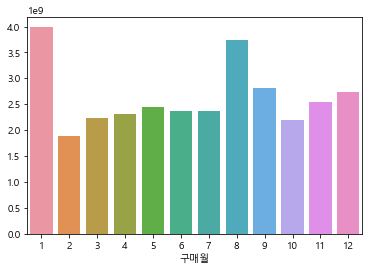

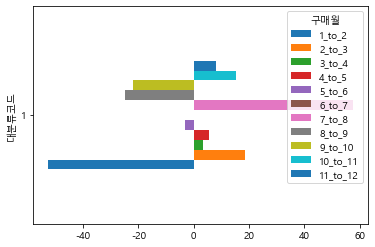

In [121]:
def visualization_sales_per(df1, df2):
    import matplotlib.pyplot as plt
    from matplotlib import rc
    import numpy as np

    rc('font',family='Malgun Gothic') # 한글 폰트 설정
    plt.rcParams['axes.unicode_minus'] = False #
    
    
    def bar_color(df,color1,color2):
        return np.where(df.values>0,color1,color2).T
    
    sns.barplot(data=df1)
    df2.plot.barh()
    
visualization_sales_per(a1,a2)

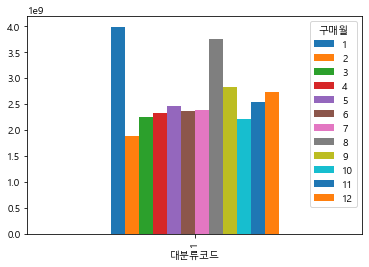

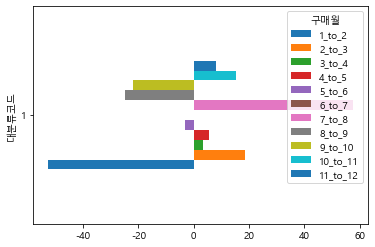

In [101]:
visualization_sales_per(a1,a2)

In [1]:
import pandas as pd
purprd_14A_org = pd.read_csv('제휴사별2014TR/A제휴사2014TR',index_col=0)
purprd=purprd_14A_org
purprd  # 구매데이터 (여기는 2014만있음.. 근데 함수에는 모든연도 제휴사별로 넣어도됨)


FileNotFoundError: [Errno 2] No such file or directory: '제휴사별2014TR/A제휴사2014TR'

In [ ]:
fr

In [41]:
prodcat = pd.read_csv('LOTT/LOTT/상품분류.txt',encoding='cp949')
prodcat

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
0,A,1,101,A010101,일용잡화,위생세제
1,A,1,101,A010102,일용잡화,휴지류
2,A,1,101,A010103,일용잡화,뷰티상품
3,A,1,101,A010104,일용잡화,일용잡화
4,A,1,101,A010105,일용잡화,세트상품
...,...,...,...,...,...,...
4381,D,8,802,D080204,아이메이크업,아이섀도우
4382,D,8,802,D080205,아이메이크업,메이크업세트
4383,D,8,803,D080301,립메이크업,립스틱/립라이너
4384,D,8,803,D080302,립메이크업,립글로즈/틴트


In [42]:
# def change_with_구매_분류(purprd,prodcat):


df1=purprd
df2=prodcat

def get_month(구매일자):    # 2014년도 월은 1~12   2015년도 월은 13~24
    x=str(구매일자)
    month=int(x[4:6])
    yr = int(x[:4])
    if  yr== 2015:
        month+12
    else:
        month=month
    return month

df1['구매월'] =df1['구매일자'].apply(get_month)
df1


,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,구매연도,구매월
2479,A,2757986,1,101,A010101,15148,10,20140920,20,1000,2014,9
2480,A,2757986,1,106,A010608,15148,10,20140920,20,4100,2014,9
2481,A,2757987,1,104,A010402,400,10,20140920,12,5000,2014,9
2482,A,2757987,1,107,A010705,400,10,20140920,12,10200,2014,9
2483,A,2757988,1,101,A010101,2043,10,20140920,13,3950,2014,9
...,...,...,...,...,...,...,...,...,...,...,...,...
26282209,A,3430727,1,104,A010404,16309,29,20141231,12,32550,2014,12
26282210,A,3430727,1,107,A010704,16309,29,20141231,12,3880,2014,12
26282211,A,3430727,1,107,A010710,16309,29,20141231,12,10000,2014,12
26282212,A,3430727,1,109,A010901,16309,29,20141231,12,8940,2014,12


In [43]:
df3 = pd.merge(df1,df2[["소분류코드","소분류명","중분류명"]], how='left',on='소분류코드')

df3

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,구매연도,구매월,소분류명,중분류명
0,A,2757986,1,101,A010101,15148,10,20140920,20,1000,2014,9,위생세제,일용잡화
1,A,2757986,1,106,A010608,15148,10,20140920,20,4100,2014,9,일반가공식품,가공식품
2,A,2757987,1,104,A010402,400,10,20140920,12,5000,2014,9,채소,농산물
3,A,2757987,1,107,A010705,400,10,20140920,12,10200,2014,9,벌크김치,젓갈/반찬
4,A,2757988,1,101,A010101,2043,10,20140920,13,3950,2014,9,위생세제,일용잡화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863851,A,3430727,1,104,A010404,16309,29,20141231,12,32550,2014,12,농산가공,농산물
2863852,A,3430727,1,107,A010704,16309,29,20141231,12,3880,2014,12,규격김치,젓갈/반찬
2863853,A,3430727,1,107,A010710,16309,29,20141231,12,10000,2014,12,즉석반찬,젓갈/반찬
2863854,A,3430727,1,109,A010901,16309,29,20141231,12,8940,2014,12,주류,주류


In [44]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_pivot = pd.pivot_table(df3, index = ['중분류명'], columns='구매월',values='구매금액',aggfunc = 'sum')
df_pivot



구매월,1,2,3,4,5,6,7,8,9,10,11,12
중분류명,,,,,,,,,,,,
가공식품,809233670.00,610148140.00,672345800.00,644189480.00,706967480.00,677856660.00,726451000.00,863172900.00,766111370.00,721500010.00,754743220.00,869526030.00
가구,248818090.00,349283320.00,405754200.00,322768550.00,333438030.00,264072290.00,209769060.00,458315750.00,300197460.00,450560020.00,665695850.00,371842850.00
건강식품,548779130.00,183365350.00,193838440.00,230284650.00,322084190.00,212516270.00,224377100.00,554488420.00,329290400.00,206563120.00,262829830.00,239250820.00
골프용품,570865520.00,526409700.00,777121700.00,1015286400.00,1052519740.00,906337890.00,708521030.00,584335050.00,829195650.00,1206572840.00,1167934270.00,788572590.00
교복,8794100.00,41838550.00,2182000.00,4672600.00,3317000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
구두,326522620.00,285688680.00,424813090.00,437339890.00,510816130.00,441120650.00,439318510.00,315469640.00,382393830.00,630561940.00,564033090.00,794910130.00
기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73600.00,4638210.00,5065260.00,2767400.00
기타의류,6574290.00,5409560.00,7256070.00,9840100.00,9776190.00,7134880.00,4736050.00,6886740.00,7884700.00,8227080.00,6735700.00,7597340.00
남성 트랜디,310022410.00,243555700.00,328863040.00,338152320.00,319320470.00,259676850.00,214034890.00,225269660.00,288856090.00,481862830.00,578886500.00,574889510.00


In [45]:
## 불필요   그냥 Nan 값들이 맞게 적용됬는지 확인.


print(df_pivot.loc['기타'])
print()

## 불필요

print("기타에서 구매내역 있는 월",df3[df3['중분류명']=='기타']['구매월'].unique())

print()
print("중분류명 종류 갯수 : ",len(df3['중분류명'].unique()))




구매월
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9      73600.00
10   4638210.00
11   5065260.00
12   2767400.00
Name: 기타, dtype: float64

기타에서 구매내역 있는 월 [11 12 10  9]

중분류명 종류 갯수 :  48


In [46]:
# def 변화률(df):


def increase_rate(col_first_list, col_second_list):
    rate_list=[]
    for i in range(len(col_first_list)):
        first=col_first_list[i]
        second=col_second_list[i]
        in_rate = (second-first)/first*100
        rate_list.append(in_rate)
    return rate_list

    
for i in range(1,len(df_pivot.columns)):
    current_col=i
    a=list(df_pivot[current_col])
    b=list(df_pivot[current_col+1])
    add_col = increase_rate(a,b)
    df_pivot[f'{current_col}_to_{current_col+1}'] = add_col
df_pivot

구매월,1,2,3,4,5,6,7,8,9,10,...,2_to_3,3_to_4,4_to_5,5_to_6,6_to_7,7_to_8,8_to_9,9_to_10,10_to_11,11_to_12
중분류명,,,,,,,,,,,,,,,,,,,,,
가공식품,809233670.00,610148140.00,672345800.00,644189480.00,706967480.00,677856660.00,726451000.00,863172900.00,766111370.00,721500010.00,...,10.19,-4.19,9.75,-4.12,7.17,18.82,-11.24,-5.82,4.61,15.21
가구,248818090.00,349283320.00,405754200.00,322768550.00,333438030.00,264072290.00,209769060.00,458315750.00,300197460.00,450560020.00,...,16.17,-20.45,3.31,-20.80,-20.56,118.49,-34.50,50.09,47.75,-44.14
건강식품,548779130.00,183365350.00,193838440.00,230284650.00,322084190.00,212516270.00,224377100.00,554488420.00,329290400.00,206563120.00,...,5.71,18.80,39.86,-34.02,5.58,147.12,-40.61,-37.27,27.24,-8.97
골프용품,570865520.00,526409700.00,777121700.00,1015286400.00,1052519740.00,906337890.00,708521030.00,584335050.00,829195650.00,1206572840.00,...,47.63,30.65,3.67,-13.89,-21.83,-17.53,41.90,45.51,-3.20,-32.48
교복,8794100.00,41838550.00,2182000.00,4672600.00,3317000.00,NaN,NaN,NaN,NaN,NaN,...,-94.78,114.14,-29.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
구두,326522620.00,285688680.00,424813090.00,437339890.00,510816130.00,441120650.00,439318510.00,315469640.00,382393830.00,630561940.00,...,48.70,2.95,16.80,-13.64,-0.41,-28.19,21.21,64.90,-10.55,40.93
기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73600.00,4638210.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6201.92,9.21,-45.37
기타의류,6574290.00,5409560.00,7256070.00,9840100.00,9776190.00,7134880.00,4736050.00,6886740.00,7884700.00,8227080.00,...,34.13,35.61,-0.65,-27.02,-33.62,45.41,14.49,4.34,-18.13,12.79
남성 트랜디,310022410.00,243555700.00,328863040.00,338152320.00,319320470.00,259676850.00,214034890.00,225269660.00,288856090.00,481862830.00,...,35.03,2.82,-5.57,-18.68,-17.58,5.25,28.23,66.82,20.14,-0.69


In [47]:
df_pivot.to_pickle('중분류_rate.pkl')


In [17]:
A_data = pd.read_pickle('제휴사별/A_대분류코드_rate.pkl')
A_data

구매월,1,2,3,4,5,6,7,8,9,10,...,2_to_3,3_to_4,4_to_5,5_to_6,6_to_7,7_to_8,8_to_9,9_to_10,10_to_11,11_to_12
대분류코드,,,,,,,,,,,,,,,,,,,,,
1,6659205300,6023263320,4694374320,4883929730,5084442550,4775046820,4837467500,6142261220,7339992210,4610702410,...,-22.062608,4.037927,4.105563,-6.085146,1.307227,26.972661,19.499838,-37.183824,9.550508,7.868855
2,5619855540,5202166610,6122300750,6558238270,7986403330,5694949950,6801491280,5266511520,5872776070,7290545240,...,17.687518,7.120485,21.776657,-28.691932,19.430220,-22.568282,11.511691,24.141380,0.612429,-0.997747
3,1197895380,1357553380,1450972090,1494509690,1620982090,1163957680,997814670,1055621110,1440621700,1600412630,...,6.881402,3.000581,8.462468,-28.194291,-14.273973,5.793304,36.471475,11.091804,10.106557,-7.314867
4,12729772960,11091168810,13227908900,11942789730,12314315780,10147367430,9903500860,9160785610,10418844330,15704490920,...,19.265238,-9.715210,3.110882,-17.596985,-2.403250,-7.499522,13.733088,50.731602,13.421617,-10.699337
5,3068761450,2088298110,2539995810,2980682260,2984663920,2451834740,2038216280,1612522990,2108921320,3622557360,...,21.629943,17.349889,0.133582,-17.852234,-16.869753,-20.885580,30.783954,71.772997,7.384400,-10.660482
6,3194684260,2888859940,3759338010,4409129510,4536556180,3478463430,3094606250,2632852410,3133643570,5117000300,...,30.132235,17.284732,2.890064,-23.323700,-11.035251,-14.921247,19.020860,63.292352,-0.007117,-11.075331
7,2105688300,2082260320,2379461070,2455234170,2225307210,2274042990,2354192160,2638091440,2005651520,2469714570,...,14.272987,3.184465,-9.364767,2.190070,3.524523,12.059308,-23.973389,23.137771,27.161137,-14.592203
8,4829023480,4618328950,5358657190,4909181170,6224469390,4751630510,4583003130,4894142050,4213163150,5805483750,...,16.030219,-8.387848,26.792416,-23.662079,-3.548832,6.788975,-13.914163,37.793946,27.143993,-4.706916
9,2451137010,2438941600,2649520120,2991691450,2714248910,2442504270,2431505840,2871691030,2225554790,3568585700,...,8.634012,12.914464,-9.273769,-10.011780,-0.450293,18.103398,-22.500201,60.345893,-2.431569,-22.813762


In [21]:
A_data_all = pd.read_pickle('제휴사별/A_전체_rate.pkl')
A_data_all

구매월,1,2,3,4,5,6,7,8,9,10,...,2_to_3,3_to_4,4_to_5,5_to_6,6_to_7,7_to_8,8_to_9,9_to_10,10_to_11,11_to_12
구매금액,41856023680,37790841040,42182528260,42625385980,45691389360,37179797820,37041797970,36274479380,38759168660,49789492880,...,11.621036,1.049861,7.192905,-18.628437,-0.371169,-2.071494,6.84969,28.458619,10.406911,-7.807462


In [178]:
A_data_mid = pd.read_pickle('제휴사별/A_중분류명_rate.pkl')
A_data_mid

구매월,1,2,3,4,5,6,7,8,9,10,...,2_to_3,3_to_4,4_to_5,5_to_6,6_to_7,7_to_8,8_to_9,9_to_10,10_to_11,11_to_12
중분류명,,,,,,,,,,,,,,,,,,,,,
가공식품,1.626515e+09,1.500121e+09,1.421591e+09,1.403442e+09,1.512678e+09,1.319789e+09,1.521246e+09,1.672677e+09,1.712238e+09,1.505674e+09,...,-5.234893,-1.276635,7.783436,-12.751523,15.264320,9.954434,2.365108,-12.063963,0.629935,16.073489
가구,6.045441e+08,7.772968e+08,8.781808e+08,8.611913e+08,7.872291e+08,5.522838e+08,5.706437e+08,1.069074e+09,5.462179e+08,9.534017e+08,...,12.978821,-1.934620,-8.588361,-29.844597,3.324373,87.345319,-48.907392,74.546026,30.474264,-33.398419
건강식품,7.713565e+08,7.861083e+08,4.087428e+08,4.886115e+08,6.804199e+08,4.994362e+08,4.586346e+08,7.816188e+08,1.137072e+09,4.260046e+08,...,-48.004260,19.540081,39.255802,-26.598820,-8.169545,70.422996,45.476586,-62.534960,25.896662,-8.084899
골프용품,1.165384e+09,1.100164e+09,1.687796e+09,2.052323e+09,2.097793e+09,1.655045e+09,1.341341e+09,1.186228e+09,1.503076e+09,2.563313e+09,...,53.413074,21.597819,2.215539,-21.105405,-18.954431,-11.564020,26.710586,70.537789,-9.575069,-33.862904
교복,1.013110e+07,5.248355e+07,2.210000e+06,5.453600e+06,3.707000e+06,NaN,NaN,NaN,NaN,NaN,...,-95.789157,146.769231,-32.026551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
구두,6.798629e+08,5.924411e+08,8.987284e+08,9.000416e+08,9.978169e+08,8.137933e+08,8.453057e+08,5.851430e+08,7.393122e+08,1.137130e+09,...,51.699192,0.146118,10.863418,-18.442618,3.872282,-30.777350,26.347271,53.809141,-6.499417,18.098610
기타,2.645370e+06,7.822200e+06,1.542300e+06,1.211630e+06,1.658700e+06,2.164720e+06,2.488870e+06,1.281200e+06,8.927000e+06,6.829910e+06,...,-80.283041,-21.440057,36.898228,30.507024,14.974223,-48.522824,596.768654,-23.491543,68.380110,25.894831
기타의류,1.319352e+07,1.135966e+07,1.769502e+07,1.698480e+07,2.041079e+07,1.478531e+07,1.194382e+07,1.792472e+07,2.728535e+07,3.322502e+07,...,55.770683,-4.013672,20.170918,-27.561305,-19.218332,50.075269,52.221904,21.768715,-10.601649,-10.367267
남성 트랜디,7.283058e+08,5.989363e+08,7.676449e+08,8.264508e+08,7.500729e+08,5.697306e+08,4.725504e+08,4.640857e+08,6.119907e+08,1.061789e+09,...,28.168042,7.660553,-9.241672,-24.043298,-17.057229,-1.791280,31.870185,73.497584,16.575883,-10.471074


In [ ]:
A_data_mid

In [27]:
df_a = pd.read_pickle(f'dataset/purprd_A.pkl')
df_b = pd.read_pickle(f'dataset/purprd_B.pkl')
df_c = pd.read_pickle(f'dataset/purprd_C.pkl')
df_d = pd.read_pickle(f'dataset/purprd_D.pkl')

In [29]:
df_a.groupby('대분류코드')['구매금액'].sum()

대분류코드
1     65550240880
2     77012441130
3     16775759320
4    150359723590
5     32861877920
6     45911721700
7     28812407380
8     64602297810
9     32954674300
Name: 구매금액, dtype: int64

In [48]:
# 위에 한 것 사용자함수 만들기

purprd_14A_org = pd.read_csv('제휴사별2014TR/A제휴사2014TR',index_col=0)
purprd=purprd_14A_org

  # 구매데이터 (여기는 2014만있음.. 근데 함수에는 모든연도 제휴사별로 넣어도됨)
prodcat = pd.read_csv('LOTT/LOTT/상품분류.txt',encoding='cp949')




def get_increase_rate(제휴사별구매df,prodcat):

    df1=제휴사별구매df
    df2=prodcat

    def get_month(구매일자):    # 2014년도 월은 1~12   2015년도 월은 13~24
        x=str(구매일자)
        month=int(x[4:6])
        yr = int(x[:4])
        if  yr== 2015:
            month+12
        else:
            month=month
        return month

    df1['구매월'] =df1['구매일자'].apply(get_month)
    
    df3 = pd.merge(df1,df2[["소분류코드","소분류명","중분류명"]], how='left',on='소분류코드')


    df_pivot = pd.pivot_table(df3, index = ['중분류명'], columns='구매월',values='구매금액',aggfunc = 'sum')

    def increase_rate(col_first_list, col_second_list):
        rate_list=[]
        for i in range(len(col_first_list)):
            first=col_first_list[i]
            second=col_second_list[i]
            in_rate = (second-first)/first*100
            rate_list.append(in_rate)
        return rate_list


    for i in range(1,len(df_pivot.columns)):
        current_col=i
        a=list(df_pivot[current_col])
        b=list(df_pivot[current_col+1])
        add_col = increase_rate(a,b)
        df_pivot[f'{current_col}_to_{current_col+1}'] = add_col
    return df_pivot

  


C:\anaconda3\envs\cakd3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [49]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
get_increase_rate(purprd, prodcat)

구매월,1,2,3,4,5,6,7,8,9,10,...,2_to_3,3_to_4,4_to_5,5_to_6,6_to_7,7_to_8,8_to_9,9_to_10,10_to_11,11_to_12
중분류명,,,,,,,,,,,,,,,,,,,,,
가공식품,809233670.00,610148140.00,672345800.00,644189480.00,706967480.00,677856660.00,726451000.00,863172900.00,766111370.00,721500010.00,...,10.19,-4.19,9.75,-4.12,7.17,18.82,-11.24,-5.82,4.61,15.21
가구,248818090.00,349283320.00,405754200.00,322768550.00,333438030.00,264072290.00,209769060.00,458315750.00,300197460.00,450560020.00,...,16.17,-20.45,3.31,-20.80,-20.56,118.49,-34.50,50.09,47.75,-44.14
건강식품,548779130.00,183365350.00,193838440.00,230284650.00,322084190.00,212516270.00,224377100.00,554488420.00,329290400.00,206563120.00,...,5.71,18.80,39.86,-34.02,5.58,147.12,-40.61,-37.27,27.24,-8.97
골프용품,570865520.00,526409700.00,777121700.00,1015286400.00,1052519740.00,906337890.00,708521030.00,584335050.00,829195650.00,1206572840.00,...,47.63,30.65,3.67,-13.89,-21.83,-17.53,41.90,45.51,-3.20,-32.48
교복,8794100.00,41838550.00,2182000.00,4672600.00,3317000.00,NaN,NaN,NaN,NaN,NaN,...,-94.78,114.14,-29.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
구두,326522620.00,285688680.00,424813090.00,437339890.00,510816130.00,441120650.00,439318510.00,315469640.00,382393830.00,630561940.00,...,48.70,2.95,16.80,-13.64,-0.41,-28.19,21.21,64.90,-10.55,40.93
기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73600.00,4638210.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6201.92,9.21,-45.37
기타의류,6574290.00,5409560.00,7256070.00,9840100.00,9776190.00,7134880.00,4736050.00,6886740.00,7884700.00,8227080.00,...,34.13,35.61,-0.65,-27.02,-33.62,45.41,14.49,4.34,-18.13,12.79
남성 트랜디,310022410.00,243555700.00,328863040.00,338152320.00,319320470.00,259676850.00,214034890.00,225269660.00,288856090.00,481862830.00,...,35.03,2.82,-5.57,-18.68,-17.58,5.25,28.23,66.82,20.14,-0.69
